This is a notebook that computes and scans soliton-only model.
It uses an evenly spaced grid

# Init

In [1]:
from __future__ import division

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.insert(0, '../')

In [4]:
import numpy as np
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.integrate import quad
import h5py
import glob
import re
import os

import scan
import pickle
import glob
from multiprocessing import Pool
from contextlib import closing

from matplotlib import cm
from tqdm import tqdm

from multiprocessing import Pool
from contextlib import closing
from scipy.optimize import root_scalar

In [5]:
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import spc
import model
import chi2
import margin
import tools as tl

In [6]:
from matplotlib import rcParams
#rcParams["font.family"] = "Times New Roman"
rcParams['font.size'] = 14

In [7]:
SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 17

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [8]:
path = '../data/SPARC.txt'
data = spc.readSPARC(path)

path = '../data/SPARC_Lelli2016c.txt'
spc.readSPARC_ext(data, path)

In [9]:
data2 = {}
for gal in data:
    data2[gal.name] = gal

# Scan on all SPARC - from scan.py

In [13]:
os.getcwd()

'/tomerv2/cs/BEC_dynamics/submit/notebooks'

In [10]:
# scan can be done with notebook 4

Load up the scan result

<IPython.core.display.Javascript object>


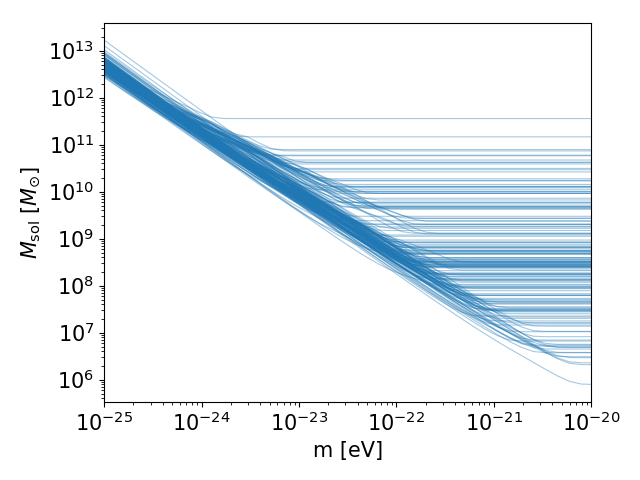

In [15]:
bound_dct = {}
bound_range_dct = {}

plt.subplots()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('m [eV]')
plt.ylabel(r'$M_{\rm sol}$ [$M_{\odot}$]')
#plt.ylim(0.05, 10)
#plt.xlim(2e-24, 1e-19)
plt.xlim(1e-25, 1e-20)

ratio_upper = 2
ratio_lower = 0.5

M_joint_arr = []
m_joint_arr = []
n_ind = 1

path_wild = '../../results_bisection_04/*'
path_arr = glob.glob(path_wild)
for path in path_arr:
    with open(path, 'r') as f:
        results= pickle.load(f)      
        res_arr = results.storage
        #scan.analyze(res_arr, res_arr[0].sigma_lvl)
        
        m_plt_arr = []
        M_plt_arr = []
        for result in res_arr:
            if not result.sane:
                continue            
            m = result.m
            M = result.M_arr[n_ind]
            m_plt_arr.append(m)
            M_plt_arr.append(M)
        
        # the bound
        m_plt_arr = np.asarray(m_plt_arr)        
        Msol_SH_arr = model.M_SH(m_plt_arr, result.gal)
        ratio_arr = M_plt_arr / Msol_SH_arr * Msol_SH_arr
        #mask = ratio_arr < ratio_upper * 10
        plt.plot(m_plt_arr, ratio_arr, lw='0.8', color='C0', alpha=0.4)
        #m_joint_arr, M_joint_arr = scan.lower_array(m_joint_arr, M_joint_arr, m_plt_arr, ratio_arr)
        
#         # log the range of m where SH is in tension with SPARC:
#         def func(m):
#             return np.interp(np.log10(m), np.log10(m_plt_arr), ratio_arr, left=np.nan, right=np.nan)
#         def root1(log10m):
#             return func(10**log10m) - 1.
#         def root05(log10m):
#             return func(10**log10m) - 0.5
#         def root2(log10m):
#             return func(10**log10m) - 2.
        
#         try:
#             m_up_sol = root_scalar(root1, method='bisect', bracket=[np.log10(m_plt_arr)[np.argmin(ratio_arr)], np.log10(m_plt_arr)[-1]])
#             m_low_sol = root_scalar(root1, method='bisect', bracket=[np.log10(m_plt_arr)[np.argmin(ratio_arr)], np.log10(m_plt_arr)[0]])
#             #print(m_up)
#         except ValueError:
#             continue
        #bound_range_dct[result.gal.name] = (m_low_sol, m_up_sol)            
#         # plot out the contour to check
#         mask1 = np.where(m_plt_arr > 10**m_low_sol.root, True, False)
#         mask2 = np.where(m_plt_arr < 10**m_up_sol.root, True, False)
#         mask = mask1 * mask2
#         plt.plot(m_plt_arr[mask], ratio_arr[mask], lw='0.8', color='C0', alpha=0.4)

# the joint bound
#plt.fill_between(m_plt_arr, M_joint_arr, 10, color='C0', alpha=0.2)
#bound_dct[str(n_ind)] = (m_plt_arr, M_joint_arr)

# # the SH prediction
# x = np.logspace(-25, -18)
# y = [1] * 50
# ylow = [ratio_lower] * 50
# yup = [ratio_upper] * 50
# plt.fill_between(x, ylow, yup, alpha=0.3, color='r', zorder=0.1)
# plt.plot(x, y, 'k--', alpha=0.8)

#m_test = np.logspace(-24, -22.8)
#M_test = 8*(m_test/1e-24)**(-1/2)
#plt.plot(m_test, M_test, '--', color='b', zorder=5)

#m_test = np.logspace(-20.5, -19)
#M_test = 2.*(m_test/m_test[0])
#plt.plot(m_test, M_test, '--', color='b', zorder=5)

plt.rcParams.update({'font.size': 13})
plt.tight_layout()

plt.savefig('./plots/sol_full_SPARC_Msun_normalization_2sigma.pdf')

<IPython.core.display.Javascript object>


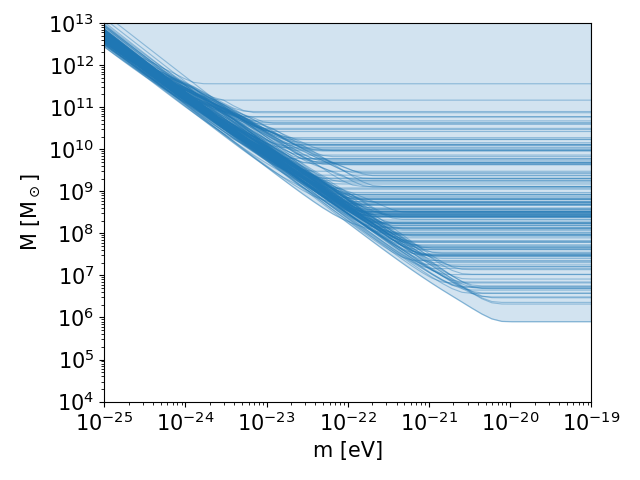

In [16]:
plt.subplots()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('m [eV]')
plt.ylabel('M [M$_\odot$]')
#plt.ylim(0.05, 10)
#plt.xlim(2e-24, 1e-19)
plt.ylim(1e4, 1e13)
plt.xlim(1e-25, 1e-19)

ratio_upper = 2
ratio_lower = 0.5

M_joint_arr = []
m_joint_arr = []
n_ind = 1

path_wild = '../../results_bisection_04/*'
path_arr = glob.glob(path_wild)
for path in path_arr:
    with open(path, 'r') as f:
        results= pickle.load(f)      
        res_arr = results.storage
        #scan.analyze(res_arr, res_arr[0].sigma_lvl)
        
        m_plt_arr = []
        M_plt_arr = []
        for result in res_arr:
            if not result.sane:
                continue            
            m = result.m
            M = result.M_arr[n_ind]
            m_plt_arr.append(m)
            M_plt_arr.append(M)
        
        # the bound
        m_plt_arr = np.asarray(m_plt_arr)        
        Msol_SH_arr = model.M_SH(m_plt_arr, result.gal)
        ratio_arr = M_plt_arr/ Msol_SH_arr
        
        plt.plot(m_plt_arr, M_plt_arr, lw='0.8', color='C0', alpha=0.4)
        
        m_joint_arr, M_joint_arr = scan.lower_array(m_joint_arr, M_joint_arr, m_plt_arr, M_plt_arr)

# the joint bound
plt.fill_between(m_plt_arr, M_joint_arr, 1e20, color='C0', alpha=0.2)
#bound_dct[str(n_ind)] = (m_plt_arr, M_joint_arr)

# # the SH prediction
# x = np.logspace(-25, -18)
# y = [1] * 50
# ylow = [ratio_lower] * 50
# yup = [ratio_upper] * 50
# plt.fill_between(x, ylow, yup, alpha=0.5, color='C1', zorder=3)
# plt.plot(x, y, 'k--')

# m_test = np.logspace(-24, -22.8)
# M_test = 8*(m_test/1e-24)**(-1/2)
# plt.plot(m_test, M_test, 'b--', zorder=5)

# m_test = np.logspace(-20.5, -19)
# M_test = 2.*(m_test/m_test[0])
# plt.plot(m_test, M_test, 'b--', zorder=5)

plt.rcParams.update({'font.size': 13})
plt.tight_layout()

plt.savefig('./plots/sol_full_SPARC_2sigma.pdf')

<IPython.core.display.Javascript object>


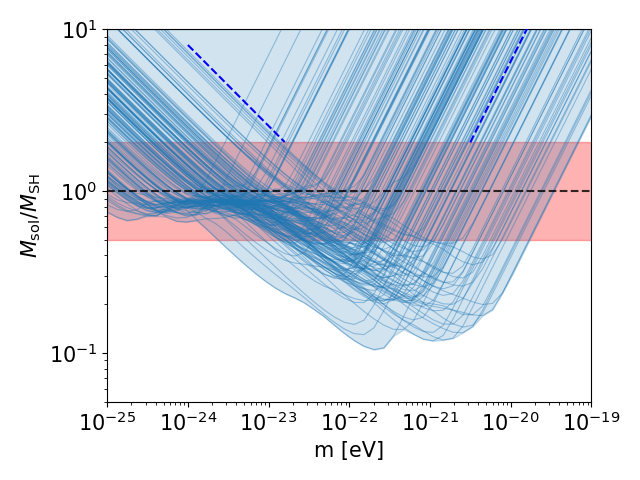

In [46]:
bound_dct = {}
bound_range_dct = {}

plt.subplots()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('m [eV]')
plt.ylabel(r'$M_{\rm sol}/M_{\rm SH}$')
plt.ylim(0.05, 10)
#plt.xlim(2e-24, 1e-19)
plt.xlim(1e-25, 1e-19)

ratio_upper = 2
ratio_lower = 0.5

M_joint_arr = []
m_joint_arr = []
n_ind = 1

path_wild = '../../results_bisection_04/*'
path_arr = glob.glob(path_wild)
for path in path_arr:
    with open(path, 'r') as f:
        results= pickle.load(f)      
        res_arr = results.storage
        #scan.analyze(res_arr, res_arr[0].sigma_lvl)
        
        m_plt_arr = []
        M_plt_arr = []
        for result in res_arr:
            if not result.sane:
                continue            
            m = result.m
            M = result.M_arr[n_ind]
            m_plt_arr.append(m)
            M_plt_arr.append(M)
        
        # the bound
        m_plt_arr = np.asarray(m_plt_arr)        
        Msol_SH_arr = model.M_SH(m_plt_arr, result.gal)
        ratio_arr = M_plt_arr/ Msol_SH_arr
        mask = ratio_arr < ratio_upper * 10
        plt.plot(m_plt_arr[mask], ratio_arr[mask], lw='0.8', color='C0', alpha=0.4)
        m_joint_arr, M_joint_arr = scan.lower_array(m_joint_arr, M_joint_arr, m_plt_arr, ratio_arr)
        
        # log the range of m where SH is in tension with SPARC:
        def func(m):
            return np.interp(np.log10(m), np.log10(m_plt_arr), ratio_arr, left=np.nan, right=np.nan)
        def root1(log10m):
            return func(10**log10m) - 1.
        def root05(log10m):
            return func(10**log10m) - 0.5
        def root2(log10m):
            return func(10**log10m) - 2.
        
        try:
            m_up_sol = root_scalar(root1, method='bisect', bracket=[np.log10(m_plt_arr)[np.argmin(ratio_arr)], np.log10(m_plt_arr)[-1]])
            m_low_sol = root_scalar(root1, method='bisect', bracket=[np.log10(m_plt_arr)[np.argmin(ratio_arr)], np.log10(m_plt_arr)[0]])
            #print(m_up)
        except ValueError:
            continue
        bound_range_dct[result.gal.name] = (m_low_sol, m_up_sol)            
#         # plot out the contour to check
#         mask1 = np.where(m_plt_arr > 10**m_low_sol.root, True, False)
#         mask2 = np.where(m_plt_arr < 10**m_up_sol.root, True, False)
#         mask = mask1 * mask2
#         plt.plot(m_plt_arr[mask], ratio_arr[mask], lw='0.8', color='C0', alpha=0.4)

# the joint bound
plt.fill_between(m_plt_arr, M_joint_arr, 10, color='C0', alpha=0.2)
bound_dct[str(n_ind)] = (m_plt_arr, M_joint_arr)

# the SH prediction
x = np.logspace(-25, -18)
y = [1] * 50
ylow = [ratio_lower] * 50
yup = [ratio_upper] * 50
plt.fill_between(x, ylow, yup, alpha=0.3, color='r', zorder=0.1)
plt.plot(x, y, 'k--', alpha=0.8)

m_test = np.logspace(-24, -22.8)
M_test = 8*(m_test/1e-24)**(-1/2)
plt.plot(m_test, M_test, '--', color='b', zorder=5)

m_test = np.logspace(-20.5, -19)
M_test = 2.*(m_test/m_test[0])
plt.plot(m_test, M_test, '--', color='b', zorder=5)

plt.rcParams.update({'font.size': 13})
plt.tight_layout()

#plt.savefig('./plots/sol_full_SPARC_2sigma.pdf')
#plt.savefig('./plots/sol_full_SPARC_2sigma_talk_1.pdf', facecolor=(256/256.,252/256.,244/256.))
#plt.savefig('./plots/sol_full_SPARC_2sigma_talk.pdf', facecolor=(256/256.,252/256.,244/256.))

In [22]:
# the sigma indices need to really exist corresponding to result.sigma_lvl
for n_ind in [1, 2,4,5]:
    
    M_joint_arr = []
    m_joint_arr = []

#     path_wild = '../../results_test10/*'
#     path_arr = glob.glob(path_wild)
    for path in path_arr:
        with open(path, 'r') as f:
            results= pickle.load(f)      
            res_arr = results.storage
            #scan.analyze(res_arr, res_arr[0].sigma_lvl)                

            m_plt_arr = []
            M_plt_arr = []
            for result in res_arr:
                if not result.sane:
                    continue      
                
                m = result.m
                M = result.M_arr[n_ind]
                m_plt_arr.append(m)
                M_plt_arr.append(M)

            # the bound
            m_plt_arr = np.asarray(m_plt_arr)        
            Msol_SH_arr = model.M_SH(m_plt_arr, result.gal)
            ratio_arr = M_plt_arr/ Msol_SH_arr
            mask = ratio_arr < ratio_upper * 10
            m_joint_arr, M_joint_arr = scan.lower_array(m_joint_arr, M_joint_arr, m_plt_arr, ratio_arr)

    # the joint bound
    bound_dct[str(n_ind)] = (m_plt_arr, M_joint_arr)


<IPython.core.display.Javascript object>


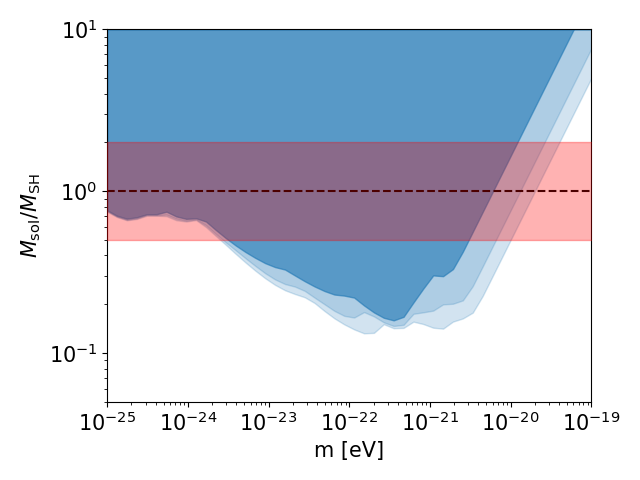

In [24]:
plt.subplots()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('m [eV]')
plt.ylabel(r'$M_{\rm sol}/M_{\rm SH}$')
plt.ylim(0.05, 10)
plt.xlim(1e-25, 1e-19)

# 3sigma
(m, Mratio) = bound_dct['2']
plt.fill_between(m, Mratio, 10, alpha=0.2, color='C0')

# 5sigma
(m, Mratio) = bound_dct['4']
plt.fill_between(m, Mratio, 10, alpha=0.2, color='C0')

# 10sigma
(m, Mratio) = bound_dct['5']
plt.fill_between(m, Mratio, 10, alpha=0.6, color='C0')


# the SH prediction
x = np.logspace(-25, -18)
y = [1] * 50
ylow = [ratio_lower] * 50
yup = [ratio_upper] * 50
plt.fill_between(x, ylow, yup, alpha=0.3, color='r', zorder=3)
plt.plot(x, y, 'k--')

plt.rcParams.update({'font.size': 13})
plt.tight_layout()

plt.savefig('./plots/sol_full_SPARC_combine.pdf')

<IPython.core.display.Javascript object>


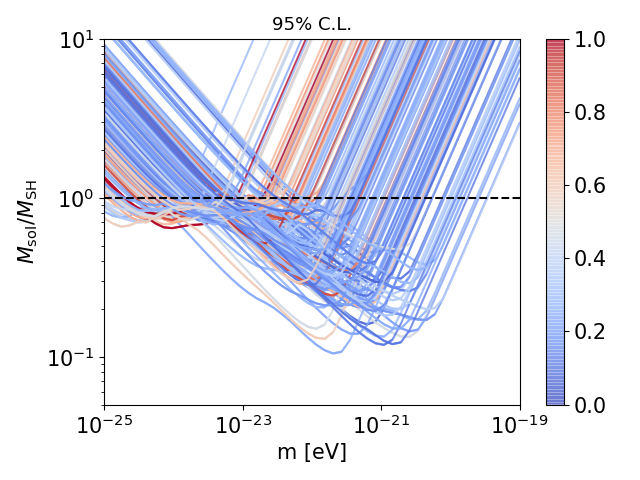

In [31]:
_, ax = plt.subplots()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('m [eV]')
plt.ylabel(r'$M_{\rm sol}/M_{\rm SH}$')
plt.ylim(0.05, 10)
plt.xlim(1e-25, 1e-19)

ratio_upper = 2
ratio_lower = 0.5
f_cut = 1

M_joint_arr = []
m_joint_arr = []
n_ind = 1

counter = 0

path_wild = '../../results_bisection_04/*'
path_arr = glob.glob(path_wild)
for path in path_arr:
    with open(path, 'r') as f:
        results= pickle.load(f)      
        res_arr = results.storage
        #scan.analyze(res_arr, res_arr[0].sigma_lvl)        
        
        m_plt_arr = []
        M_plt_arr = []
        for result in res_arr:
            if not result.sane:
                continue            
            m = result.m
            M = result.M_arr[n_ind]
            m_plt_arr.append(m)
            M_plt_arr.append(M)
        
        # the bound
        m_plt_arr = np.asarray(m_plt_arr)        
        Msol_SH_arr = model.M_SH(m_plt_arr, result.gal)
        ratio_arr = M_plt_arr/ Msol_SH_arr
        mask = ratio_arr < ratio_upper * 10
        m_plt_finer_arr = np.logspace(np.log10(m_plt_arr[0]), np.log10(m_plt_arr[-1]), 1000)
        ratio_finer_arr = np.exp(np.interp(np.log(m_plt_finer_arr), 
                                           np.log(m_plt_arr), 
                                           np.log(ratio_arr)))
        M_plt_finer_arr = np.exp(np.interp(np.log(m_plt_finer_arr), 
                                           np.log(m_plt_arr), 
                                           np.log(M_plt_arr)))        
        fbar2DM =[]
        for i, mm in enumerate(m_plt_finer_arr):
            MMsol = M_plt_finer_arr[i]
            val = model.bar_ratio_at_peak(result.gal, MMsol)            
            val = min(val, 1)
            fbar2DM.append(val)
            if val > f_cut:
                ratio_finer_arr[i] = 100
        fbar2DM[0] = 0
        fbar2DM[1] = 1
        sc = plt.scatter(m_plt_finer_arr, ratio_finer_arr, s=0.4, c=(fbar2DM), cmap=cm.coolwarm, alpha=0.5)               
        m_joint_arr, M_joint_arr = scan.lower_array(m_joint_arr, M_joint_arr, m_plt_finer_arr, ratio_finer_arr)
        counter += 1
        
plt.colorbar(sc)

# the joint bound
#plt.fill_between(m_joint_arr, M_joint_arr, 10, color='C0', alpha=0.2)
bound_dct[str(n_ind)] = (m_plt_arr, M_joint_arr)

# the SH prediction
x = np.logspace(-25, -18)
y = [1] * 50
ylow = [ratio_lower] * 50
yup = [ratio_upper] * 50
#plt.fill_between(x, ylow, yup, alpha=0.1, color='r', zorder=0)
plt.plot(x, y, 'k--')
plt.title('95% C.L.')

plt.rcParams.update({'font.size': 11})
plt.tight_layout()

#plt.savefig('./plots/sol_full_SPARC_2sigma_cmap.png')
#plt.savefig('./plots/sol_full_SPARC_2sigma_cmap.pdf')

In [26]:
counter

175

#### annimation

<IPython.core.display.Javascript object>


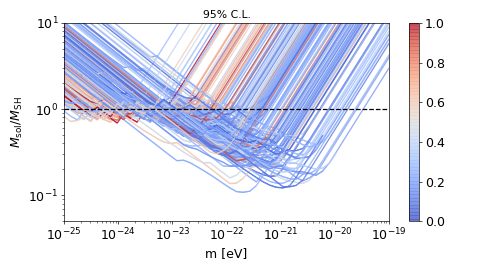





  0%|          | 0/175 [00:00<?, ?it/s]



  1%|          | 1/175 [00:00<01:32,  1.88it/s]



  1%|          | 2/175 [00:00<01:14,  2.32it/s]



  2%|▏         | 3/175 [00:00<01:02,  2.75it/s]



  2%|▏         | 4/175 [00:01<00:54,  3.16it/s]



  3%|▎         | 5/175 [00:01<00:48,  3.50it/s]



  3%|▎         | 6/175 [00:01<00:45,  3.75it/s]



  4%|▍         | 7/175 [00:01<00:43,  3.85it/s]



  5%|▍         | 8/175 [00:02<00:42,  3.89it/s]



  5%|▌         | 9/175 [00:02<00:42,  3.90it/s]



  6%|▌         | 10/175 [00:02<00:43,  3.79it/s]



  6%|▋         | 11/175 [00:02<00:44,  3.67it/s]



  7%|▋         | 12/175 [00:03<00:46,  3.49it/s]



  7%|▋         | 13/175 [00:03<00:46,  3.47it/s]



  8%|▊         | 14/175 [00:03<00:47,  3.38it/s]



  9%|▊         | 15/175 [00:04<00:48,  3.29it/s]



  9%|▉         | 16/175 [00:04<00:49,  3.22it/s]



 10%|▉         | 17/175 [00:04<00:50,  3.15it/s]



 10%|█         | 18/175 [00:05<00:56,  2.77it/s]



 11%|█         | 19/175 [0

In [31]:
# make a individual plots

_, ax = plt.subplots(figsize=(8,4.5), dpi=60)#figsize=(5.2,3.9))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('m [eV]')
plt.ylabel(r'$M_{\rm sol}/M_{\rm SH}$')
plt.ylim(0.05, 10)
plt.xlim(1e-25, 1e-19)

# colorbar
plt.colorbar(sc)
# the SH prediction
x = np.logspace(-25, -18)
y = [1] * 50
ylow = [ratio_lower] * 50
yup = [ratio_upper] * 50
#plt.fill_between(x, ylow, yup, alpha=0.1, color='r', zorder=0)
plt.plot(x, y, 'k--')
plt.title('95% C.L.')
plt.rcParams.update({'font.size': 11})



ratio_upper = 2
ratio_lower = 0.5
f_cut = 1

M_joint_arr = []
m_joint_arr = []
n_ind = 1

counter = 0

path_wild = '../../results_test10/*'
path_arr = glob.glob(path_wild)
for path in tqdm(path_arr):
    with open(path, 'r') as f:
        results= pickle.load(f)      
        res_arr = results.storage
        scan.analyze(res_arr, res_arr[0].sigma_lvl)        
        
        m_plt_arr = []
        M_plt_arr = []
        for result in res_arr:
            if not result.sane:
                continue            
            m = result.m
            M = result.M_contours[n_ind]
            m_plt_arr.append(m)
            M_plt_arr.append(M)
        
        # the bound
        m_plt_arr = np.asarray(m_plt_arr)        
        Msol_SH_arr = model.M_SH(m_plt_arr, result.gal)
        ratio_arr = M_plt_arr/ Msol_SH_arr
        mask = ratio_arr < ratio_upper * 10
        m_plt_finer_arr = np.logspace(np.log10(m_plt_arr[0]), np.log10(m_plt_arr[-1]), 1000)
        ratio_finer_arr = np.exp(np.interp(np.log(m_plt_finer_arr), 
                                           np.log(m_plt_arr), 
                                           np.log(ratio_arr)))
        M_plt_finer_arr = np.exp(np.interp(np.log(m_plt_finer_arr), 
                                           np.log(m_plt_arr), 
                                           np.log(M_plt_arr)))        
        fbar2DM =[]
        for i, mm in enumerate(m_plt_finer_arr):
            MMsol = M_plt_finer_arr[i]
            val = model.bar_ratio_at_peak(result.gal, MMsol)            
            val = min(val, 1)
            fbar2DM.append(val)
            if val > f_cut:
                ratio_finer_arr[i] = 100
        fbar2DM[0] = 0
        fbar2DM[1] = 1
        plt.scatter(m_plt_finer_arr, ratio_finer_arr, s=0.4, c=(fbar2DM), cmap=cm.coolwarm, alpha=0.5)               
        m_joint_arr, M_joint_arr = scan.lower_array(m_joint_arr, M_joint_arr, m_plt_finer_arr, ratio_finer_arr)
        
        plt.tight_layout()
        plt.savefig('./plots/gif4/sol_full_SPARC_2sigma_cmap_%d.png' %counter)
        counter += 1
        


# # the joint bound
# #plt.fill_between(m_joint_arr, M_joint_arr, 10, color='C0', alpha=0.2)
# bound_dct[str(n_ind)] = (m_plt_arr, M_joint_arr)


#plt.savefig('./plots/sol_full_SPARC_2sigma_cmap.png')
#plt.savefig('./plots/sol_full_SPARC_2sigma_cmap.pdf')

In [19]:

# with imageio.get_writer('./plots/sol_full_SPARC_2sigma_cmap.gif', mode='I') as writer:
#     for filename in filenames:
#         image = imageio.imread(filename)
#         writer.append_data(image)


In [34]:
import imageio

filenames_raw = glob.glob('./plots/gif4/*')
filenames = sorted(filenames_raw, key=os.path.getmtime)

frames = []
#with imageio.get_writer('./plots/sol_full_SPARC_2sigma_cmap.gif', mode='I') as writer:
for filename in filenames:
    frame = imageio.imread(filename)
    frames.append(frame)
    
imageio.mimsave("./plots/sol_full_SPARC_2sigma_cmap_noloop_lowres.gif", frames, duration=0.05,loop=1)

# production plots

In [53]:
# combine galaxies
# the sigma indices need to really exist corresponding to result.sigma_lvl

f_dct_one_species = {}
m_arr = np.logspace(-25, -19, 200)

def func(gal):
    f_arr = []
    for m in m_arr:
        f_arr.append(model.f_critical(m, gal,  factor=1.)) # factor=2.))

    f_arr = np.array(f_arr)
    return (gal, m_arr, f_arr)
        
with closing(Pool()) as pool:
    res = pool.map(func, data)
    for gal, m_arr, f_arr in res:
        f_dct_one_species[gal.name] = (m_arr, f_arr)
    pool.terminate()


In [54]:
# update the BH time scale
MBH = None #1e10 #None #4e6 #1e8   #
tau_BH_dct = {}

def func(gal):    
    tau_arr = model.tau_BH(m_arr, gal, MBH) #1
    return gal, tau_arr

with closing(Pool()) as pool:
    res = pool.map(func, data)
    for gal, tau_arr in res:
        tau_BH_dct[gal.name] = tau_arr
    pool.terminate()

In [55]:
# to make SH relation fail, f has to drop to at least this little

In [597]:
len(bound_range_dct.keys())

97

<IPython.core.display.Javascript object>


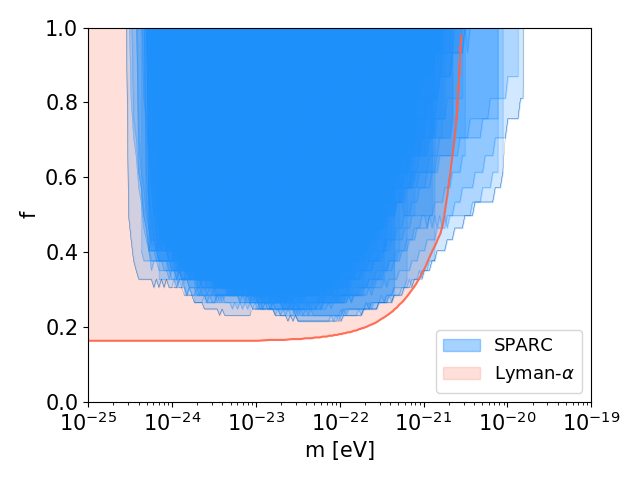

UGC02916
NGC5985
NGC5033
NGC4138
NGC1003
NGC7331
NGC1090
NGC0289
UGC05005
UGC08699
NGC3198
NGC2998
NGC3521
NGC6503
NGC4217
UGC01230
UGC03205
NGC5055
NGC2903
UGC05253
NGC3992
NGC4100
ESO563-G021
NGC4183
UGC09037
NGC3726
NGC2403
NGC0801
UGC06614
NGC6946
NGC6015
UGC00128
UGC00634
NGC2955
NGC5371
IC4202
NGC4559
NGC5907
UGC11455
NGC4088
NGC3769
UGC11914
NGC4157
UGC03580
NGC3893
NGC3953
NGC0891
UGC12506
NGC4013
NGC7814
NGC5005
NGC6195
UGC03546
NGC2683
ESO079-G014
UGC06786
UGC06787
F563-1


In [56]:
# debug
edge_low_arr = []
edge_up_arr = []
# gubed

f_joint_arr = []
m_joint_arr = []

plt.subplots() 
flg_label = True
for (galname, (m_arr, f_arr)) in f_dct_one_species.iteritems():
#     if galname != "UGC04325":
#         continue
    try:
        log10mlow_sol, log10mup_sol = bound_range_dct[galname]        
        # debug
        edge_low_arr.append(10**log10mlow_sol.root)
        edge_up_arr.append(10**log10mup_sol.root)
        if 10**log10mlow_sol.root < 1e-24:
            print(galname)
        # gubed
    except:
        continue
    mask1 = np.where(m_arr>10**log10mlow_sol.root, True, False)
    mask2 = np.where(m_arr<10**log10mup_sol.root, True, False)
    mask = mask1 * mask2
    # mask BH absorption
    mask3 = np.where(tau_BH_dct[galname]>10, True, False)
    mask = mask * mask3

#     #selection
# #     if min(f_arr) < 0.5:
# #         print(galname)
#     counter = sum(np.where(f_arr < 0.7, 1, 0))
#     if counter > 70:
#         print(galname)
#     else:
#         continue
    

    if sum(mask) > 0:
        if flg_label is True:
            plt.fill_between(m_arr[mask], f_arr[mask], 1., color='dodgerblue', alpha=0.4, interpolate='nearest', label='SPARC')        
            flg_label = False
        else:
            plt.fill_between(m_arr[mask], f_arr[mask], 1., color='dodgerblue', alpha=0.2, interpolate='nearest')        
            plt.plot(m_arr[mask], f_arr[mask], color='dodgerblue', alpha=0.6, lw='0.3')        
        m_joint_arr, f_joint_arr = scan.lower_array(m_joint_arr, f_joint_arr, m_arr[mask], f_arr[mask])
        

# check the edge
plt.plot(m_joint_arr, f_joint_arr, 'k', lw=0.2, alpha=0.5)

# overlay with Kobayashi
path = '../data/Kobayashi2017.csv'
data_lym_arr = np.loadtxt(path, delimiter=',')
x = data_lym_arr[:,0]
y = data_lym_arr[:,1]
x = np.insert(x, 0, 1e-25)
y = np.insert(y, 0, y[0])
plt.fill_between(x, y, 100, color='tomato', label=r'Lyman-$\alpha$', alpha=0.2, zorder=0)
plt.plot(x, y, color='tomato', alpha=0.9)
plt.legend(loc=4)

plt.xscale('log')
# plt.yscale('log')
# plt.ylim(0.06, 1.)
plt.ylim(0., 1.)
plt.ylabel('f')
plt.xlabel('m [eV]')
plt.xlim(1e-25, 1e-19)
plt.tight_layout()

#plt.savefig('./plots/f_2sigma.pdf')
#plt.savefig('./plots/f_2sigma_2.pdf')

#plt.savefig('./plots/f_2sigma_MoMSH05.pdf')
#plt.savefig('./plots/f_2sigma_2_MoMSH05.pdf')

<IPython.core.display.Javascript object>


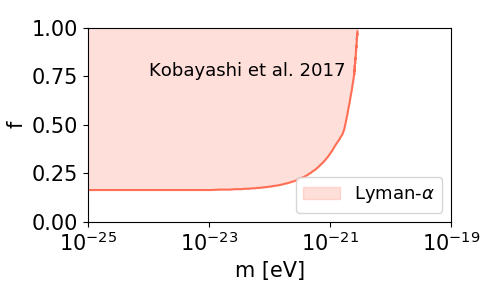

In [150]:
# overlay with Kobayashi
plt.subplots(figsize=(5,3))
path = '../data/Kobayashi2017.csv'
data_lym_arr = np.loadtxt(path, delimiter=',')
x = data_lym_arr[:,0]
y = data_lym_arr[:,1]
x = np.insert(x, 0, 1e-25)
y = np.insert(y, 0, y[0])
plt.fill_between(x, y, 100, color='tomato', label=r'Lyman-$\alpha$', alpha=0.2, zorder=0)
plt.plot(x, y, color='tomato', alpha=0.9)
plt.legend(loc=4)

plt.xscale('log')
# plt.yscale('log')
# plt.ylim(0.06, 1.)
plt.ylim(0., 1.)
plt.ylabel('f')
plt.xlabel('m [eV]')
plt.xlim(1e-25, 1e-19)

plt.text(1e-24, 0.75, "Kobayashi et al. 2017")
plt.tight_layout()
plt.savefig('./plots/talk_Kobayashi.pdf', facecolor=(256/256.,252/256.,244/256.))

In [710]:
len(m_joint_arr),len(f_joint_arr)

(2946, 180)

<IPython.core.display.Javascript object>


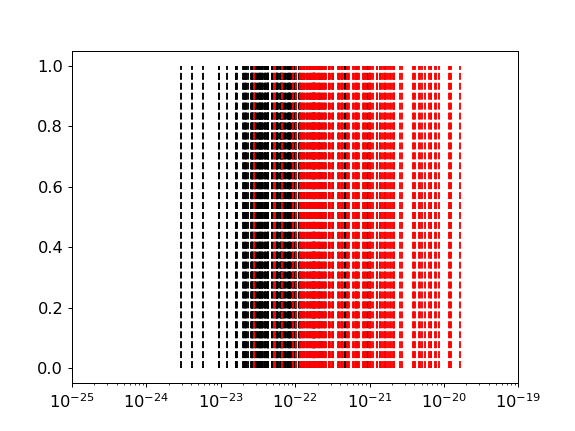

(1e-25, 1e-19)

In [588]:
# plot out the boundaries

plt.subplots()
plt.vlines(edge_low_arr, 0, 1, linestyles='--', color='k')
plt.vlines(edge_up_arr, 0, 1, linestyles='--', color='r')
plt.xscale('log')
plt.xlim(1e-25, 1e-19)

#### animation

<IPython.core.display.Javascript object>


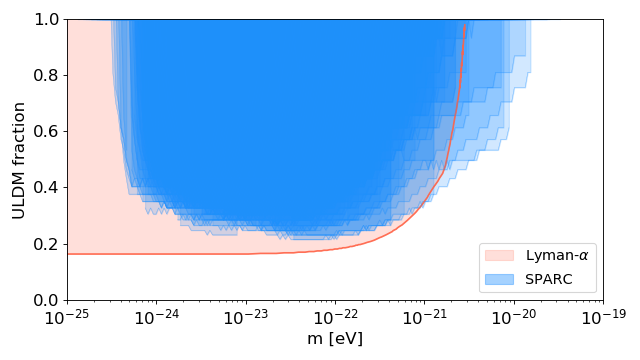

UGC02916
NGC5033
NGC4138
NGC2841
NGC7331
NGC1090
NGC0289
UGC08699
NGC3521
NGC6503
NGC4217
UGC01230
NGC2903
UGC05253
NGC3992
NGC4100
ESO563-G021
UGC09037
NGC2403
UGC02885
NGC0801
UGC06614
NGC6946
UGC00128
NGC2955
NGC5371
IC4202
NGC4559
NGC5907
UGC11455
NGC4088
NGC4157
UGC03580
NGC3893
NGC3953
NGC0891
UGC12506
NGC4013
NGC7814
UGC03546
NGC2683
UGC06787


In [74]:
counter = 0

# fig_save, ax_save = plt.subplots(figsize=(8,4.5), dpi=80) 
# # overlay with Kobayashi
# path = '../data/Kobayashi2017.csv'
# data_lym_arr = np.loadtxt(path, delimiter=',')
# x = data_lym_arr[:,0]
# y = data_lym_arr[:,1]
# x = np.insert(x, 0, 1e-25)
# y = np.insert(y, 0, y[0])
# plt.fill_between(x, y, 100, color='tomato', label=r'Lyman-$\alpha$', alpha=0.2, zorder=0)
# plt.plot(x, y, color='tomato', alpha=0.9)
# plt.legend(loc=4)

# plt.xscale('log')
# # plt.yscale('log')
# # plt.ylim(0.06, 1.)
# plt.ylim(0., 1.)
# plt.ylabel('ULDM fraction')
# plt.xlabel('m [eV]')
# plt.xlim(1e-25, 1e-19)




fig, ax = plt.subplots(figsize=(8,4.5), dpi=80) 

# overlay with Kobayashi
path = '../data/Kobayashi2017.csv'
data_lym_arr = np.loadtxt(path, delimiter=',')
x = data_lym_arr[:,0]
y = data_lym_arr[:,1]
x = np.insert(x, 0, 1e-25)
y = np.insert(y, 0, y[0])
plt.fill_between(x, y, 100, color='tomato', label=r'Lyman-$\alpha$', alpha=0.2, zorder=0)
plt.plot(x, y, color='tomato', alpha=0.9)

plt.xscale('log')
# plt.yscale('log')
# plt.ylim(0.06, 1.)
plt.ylim(0., 1.)
plt.ylabel('ULDM fraction')
plt.xlabel('m [eV]')
plt.xlim(1e-25, 1e-19)



# debug
edge_low_arr = []
edge_up_arr = []
# gubed

f_joint_arr = []
m_joint_arr = []

flg_label = True
for (galname, (m_arr, f_arr)) in f_dct_one_species.iteritems():
#     if galname != "UGC04325":
#         continue
    try:
        log10mlow_sol, log10mup_sol = bound_range_dct[galname]        
        # debug
        edge_low_arr.append(10**log10mlow_sol.root)
        edge_up_arr.append(10**log10mup_sol.root)
        if 10**log10mlow_sol.root < 1e-24:
            print(galname)
        # gubed
    except:
        continue
    mask1 = np.where(m_arr>10**log10mlow_sol.root, True, False)
    mask2 = np.where(m_arr<10**log10mup_sol.root, True, False)
    mask = mask1 * mask2
    # mask BH absorption
    mask3 = np.where(tau_BH_dct[galname]>10, True, False)
    mask = mask * mask3

#     #selection
# #     if min(f_arr) < 0.5:
# #         print(galname)
#     counter = sum(np.where(f_arr < 0.7, 1, 0))
#     if counter > 70:
#         print(galname)
#     else:
#         continue
    

    if sum(mask) > 0:
        if flg_label is True:
            l1 = ax.fill_between(m_arr[mask], f_arr[mask], 1., color='black', alpha=0.4, interpolate='nearest', label='SPARC')        
            #l1o, = ax_save.fill_between(m_arr[mask], f_arr[mask], 1., color='dodgerblue', alpha=0.4, interpolate='nearest', label='SPARC')        
            l1o, = ax.plot(m_arr[mask], f_arr[mask], color='black', alpha=0.6, lw='0.3')        
            flg_label = False
        else:
            l1 = ax.fill_between(m_arr[mask], f_arr[mask], 1., color='black', alpha=0.2, interpolate='nearest')        
            #ax_save.fill_between(m_arr[mask], f_arr[mask], 1., color='dodgerblue', alpha=0.2, interpolate='nearest')        
            l1o, = ax.plot(m_arr[mask], f_arr[mask], color='black', alpha=0.6, lw='0.3')        
            #ax_save.plot(m_arr[mask], f_arr[mask], color='dodgerblue', alpha=0.6, lw='0.3')        
        m_joint_arr, f_joint_arr = scan.lower_array(m_joint_arr, f_joint_arr, m_arr[mask], f_arr[mask])
        plt.legend(loc=4)
        # material for gif
        plt.tight_layout()
        plt.savefig('./plots/gif_f/f_2sigma_%d.png' %counter)
        #ax = ax_save
        #fig = fig_save
        l1.set_color('dodgerblue')
        l1o.set_color('dodgerblue')
        counter += 1
#     if counter > 20:
#         break

# the last one
plt.savefig('./plots/gif_f/f_2sigma_%d.png' %counter)

        
# # check the edge
# plt.plot(m_joint_arr, f_joint_arr, 'k', lw=0.2, alpha=0.5)




#plt.savefig('./plots/f_2sigma.pdf')
#plt.savefig('./plots/f_2sigma_2.pdf')

#plt.savefig('./plots/f_2sigma_MoMSH05.pdf')
#plt.savefig('./plots/f_2sigma_2_MoMSH05.pdf')

In [75]:
import imageio

filenames_raw = glob.glob('./plots/gif_f/*')
filenames = sorted(filenames_raw, key=os.path.getmtime)

frames = []
for filename in filenames:
    frame = imageio.imread(filename)
    frames.append(frame)
    
imageio.mimsave("./plots/f_2sigma.gif", frames, duration=0.05,loop=1)

# scan two species

In [51]:
m2 = 1e-23
f2 = 0.1
f_dct = {}

def func(gal):
    m_arr = np.logspace(-25, -19, 200)
    f_arr = []
    for m1 in m_arr:
        f_arr.append(model.f_critical_two_species(m1, m2, f2, gal))

    f_arr = np.array(f_arr)
    return (gal, m_arr, f_arr)
        
with closing(Pool()) as pool:
    res = pool.map(func, data)
    for gal, m_arr, f_arr in res:
        f_dct[gal.name] = (m_arr, f_arr)
    pool.terminate()

<IPython.core.display.Javascript object>


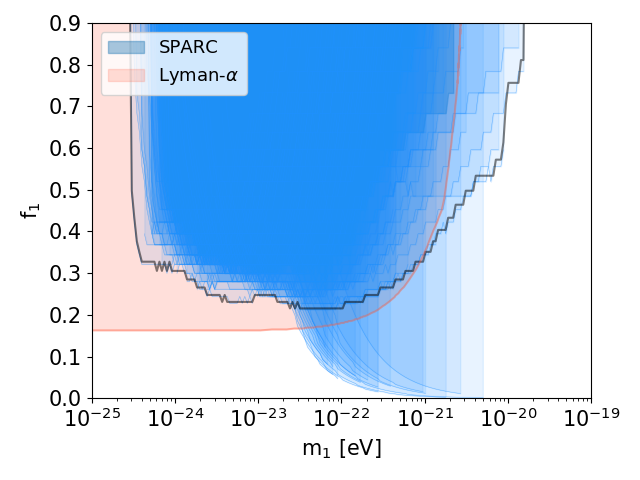

In [57]:
plt.subplots() 
flg_label = True

f2spec_joint_arr = []
m2spec_joint_arr = []


for (galname, (m_arr, f_arr)) in f_dct.iteritems():
#     mask1 = np.where(m_arr>m_low_1, True, False)
#     mask2 = np.where(m_arr<m_up_1, True, False)
#     mask = mask1 * mask2
#     #mask = [True] * len(m_arr)
    try:
        log10mlow_sol, log10mup_sol = bound_range_dct[galname]
    except:
        continue
    mask1 = np.where(m_arr>10**log10mlow_sol.root, True, False)
    mask2 = np.where(m_arr<10**log10mup_sol.root, True, False)
    
#     # make sure there's still enough mass to make the soliton
#     Msol_arr = model.M_SH(m_arr, gal)
#     mask3 = np.where(f_arr>(Msol_arr/()), True, False)
    
    mask = mask1 * mask2    
    
    if sum(mask) > 0:
        if flg_label is True:
            plt.fill_between(m_arr[mask], f_arr[mask], 1., color='C0', alpha=0.4, interpolate='nearest', label='SPARC')        
            flg_label = False
        else:
            plt.fill_between(m_arr[mask], f_arr[mask], 1., color='dodgerblue', alpha=0.1, interpolate='nearest')        
            plt.plot(m_arr[mask], f_arr[mask], color='dodgerblue', alpha=0.6, lw='0.3')        
            pass
        m2spec_joint_arr, f2spec_joint_arr = scan.lower_array(m2spec_joint_arr, f2spec_joint_arr, m_arr[mask], f_arr[mask])

# # the SPARC boundary 
# plt.vlines(m_low_05, 0.001, 20, color='k', linestyle=':')
# plt.vlines(m_low_1, 0.001, 20, color='k', linestyle=':')
# plt.vlines(m_low_2, 0.001, 20, color='k', linestyle=':')
# plt.vlines(m_up_05, 0.001, 20, color='k', linestyle=':')
# plt.vlines(m_up_1, 0.001, 20, color='k', linestyle=':')
# plt.vlines(m_up_2, 0.001, 20, color='k', linestyle=':')


# check the edge
#plt.plot(m2spec_joint_arr, f2spec_joint_arr, 'k', lw=0.2, alpha=0.6)
#plt.fill_between(m_joint_arr, f_joint_arr, 1., color='dodgerblue', alpha=0.6, interpolate='nearest', label='single species')        
plt.plot(m_joint_arr, f_joint_arr, color='k', alpha=0.5)#, label='single species')        
#plt.fill_between(m2spec_joint_arr, f2spec_joint_arr, 1., color='dodgerblue', alpha=0.3, interpolate='nearest', label='m$_2$=%s eV, f$_2$=%.0f%%' %(tl.scientific(m2), f2*100))

# overlay with Kobayashi
path = '../data/Kobayashi2017.csv'
data_lym_arr = np.loadtxt(path, delimiter=',')
x = data_lym_arr[:,0]
y = data_lym_arr[:,1]
x = np.insert(x, 0, 1e-25)
y = np.insert(y, 0, y[0])
plt.fill_between(x, y, 100, color='tomato', label=r'Lyman-$\alpha$', alpha=0.2, zorder=0)
plt.plot(x, y, color='tomato', alpha=0.4)
plt.legend(loc=2)

plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.5e-3, 1.-f2)
plt.ylabel('f$_1$')
plt.xlabel('m$_1$ [eV]')
plt.xlim(1e-25, 1e-19)
#plt.grid(zorder=1e8)

#plt.title('m$_2$=%s eV, f$_2$=%.0f%%' %(tl.scientific(m2), f2*100))
#plt.title('m=%s eV, %s' %(tl.scientific(m), gal.name))
plt.tight_layout()
plt.savefig('./plots/f_2sigma_two_species.pdf')
#plt.savefig('./plots/f_2sigma_two_species_2e-23.pdf')